<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/Complete-Case-Studies/blob/main/Case_study(Bank_marketing_Campaign).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Session- 2, Data Cleaning

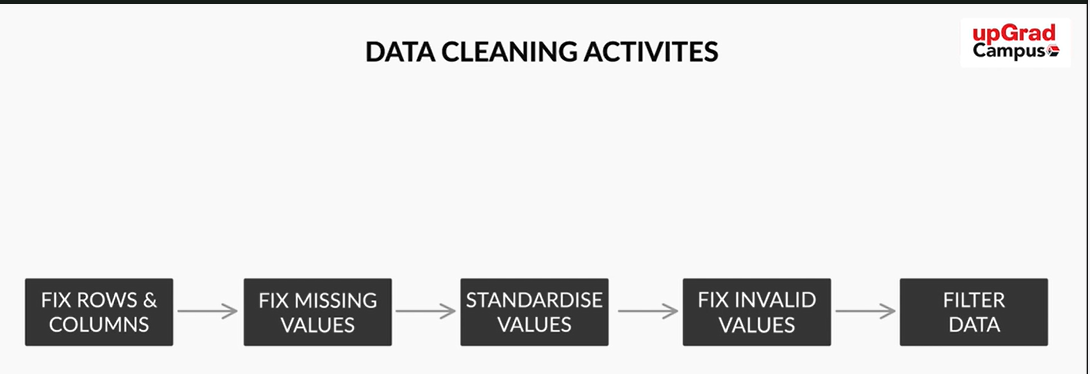

### Segment- 2, Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [ ]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("DATASETS\\Bank Dataset\\bank_marketing_updated_v1.csv")

In [ ]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [ ]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv("DATASETS\\Bank Dataset\\bank_marketing_updated_v1.csv", skiprows=2)

In [ ]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  str    
 5   jobedu      45211 non-null  str    
 6   targeted    45211 non-null  str    
 7   default     45211 non-null  str    
 8   housing     45211 non-null  str    
 9   loan        45211 non-null  str    
 10  contact     45211 non-null  str    
 11  day         45211 non-null  int64  
 12  month       45161 non-null  str    
 13  duration    45211 non-null  str    
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  str    
 18  response    45181 non-null  str    
dtypes: float64(1), int64(7), str(11)
mem

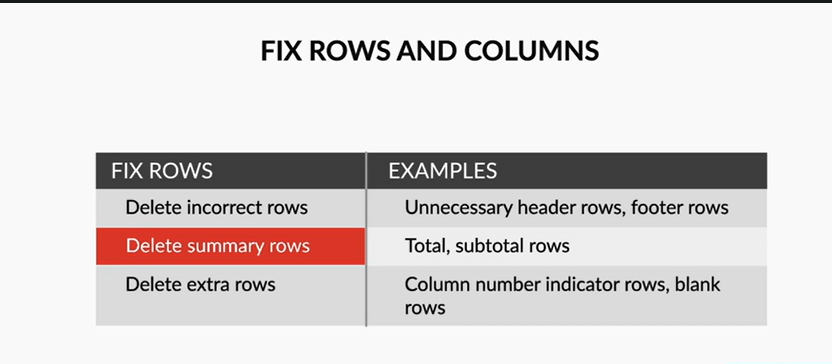

In [ ]:
#convert the age variable data type from float to integer.
#inp0["age"]=inp0["age"].astype(int)

In [ ]:
#print the average age of customers.
print(inp0["age"].mean())

40.93565090394105


#### Dropping customer id column.

In [ ]:
#drop the customer id as it is of no use.
inp0.drop("customerid",inplace=True,axis=1)

In [ ]:
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories.

In [ ]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0["jobedu"].apply(lambda x:x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [ ]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']=inp0["jobedu"].apply(lambda x:x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
#drop the "jobedu" column from the dataframe.
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
'''
#Extract the value of month from the column month
#because all the dates in the column belong to 2017
inp0.month=inp0.month.apply(lambda x:x.split(",")[0])

#Why this error lets check
'''

'\n#Extract the value of month from the column month\n#because all the dates in the column belong to 2017\ninp0.month=inp0.month.apply(lambda x:x.split(",")[0])\n\n#Why this error lets check\n'

The above cell will show this error: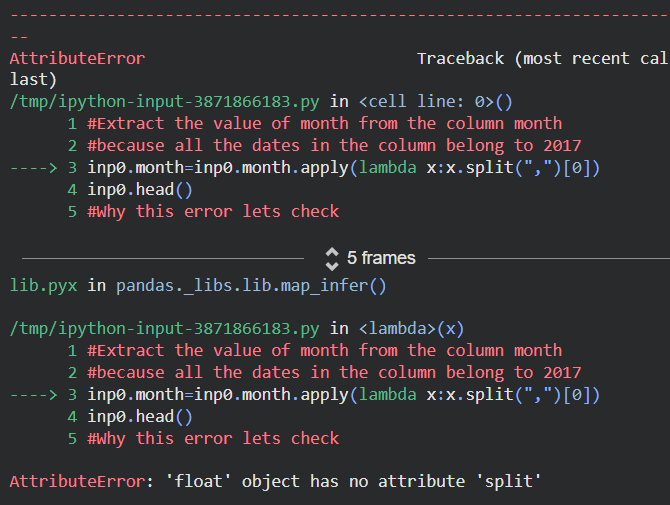

In [ ]:
inp0.info()#As we can see month is string data type so where is the error "AttributeError: 'float' object has no attribute 'split'"?

<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  str    
 4   targeted   45211 non-null  str    
 5   default    45211 non-null  str    
 6   housing    45211 non-null  str    
 7   loan       45211 non-null  str    
 8   contact    45211 non-null  str    
 9   day        45211 non-null  int64  
 10  month      45161 non-null  str    
 11  duration   45211 non-null  str    
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  str    
 16  response   45181 non-null  str    
 17  job        45211 non-null  str    
 18  education  45211 non-null  str    
dtypes: float64(1), int64(6), str(12)
memory usage: 6.6 MB


In [ ]:
#Lets check any float present in this column
inp0[inp0.month.apply(lambda x:isinstance(x,float))==True]
#Here lies the issue "Nan" value which is considered as float value thats an issue

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [ ]:
#Check and remove missing values
inp0.isnull().sum()
#there are 50 missing values in month column itself

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Segment- 4, Impute/Remove missing values

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [ ]:
#count the missing values in age column.

inp0.age.isnull().sum()

np.int64(20)

In [ ]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [ ]:
#calculate the percentage of missing values in age column.
round(100*(inp0.isnull().sum()/len(inp0.index)),4)

age          0.0442
salary       0.0000
balance      0.0000
marital      0.0000
targeted     0.0000
default      0.0000
housing      0.0000
loan         0.0000
contact      0.0000
day          0.0000
month        0.1106
duration     0.0000
campaign     0.0000
pdays        0.0000
previous     0.0000
poutcome     0.0000
response     0.0664
job          0.0000
education    0.0000
dtype: float64

Drop the records with age missing.

In [ ]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[~(inp0["age"].isnull())]

#### handling missing values in month column

In [ ]:
#count the missing values in month column in inp1.
round(100*(inp1.isnull().sum()/len(inp0.index)),4)#Age column is fixed now

age          0.0000
salary       0.0000
balance      0.0000
marital      0.0000
targeted     0.0000
default      0.0000
housing      0.0000
loan         0.0000
contact      0.0000
day          0.0000
month        0.1106
duration     0.0000
campaign     0.0000
pdays        0.0000
previous     0.0000
poutcome     0.0000
response     0.0664
job          0.0000
education    0.0000
dtype: float64

In [ ]:
#print the percentage of each month in the data frame inp1.


In [ ]:
#find the mode of month in inp1

x=inp1.month.mode()[0]
x

'may, 2017'

In [ ]:
# fill the missing values with mode value of month in inp1.

inp1.month.fillna(x,inplace=True)

0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45191, dtype: str

In [ ]:
#calculate the percentage of missing values in response column.
100*round(inp1.isnull().sum()/len(inp1.index),5)

age          0.000
salary       0.000
balance      0.000
marital      0.000
targeted     0.000
default      0.000
housing      0.000
loan         0.000
contact      0.000
day          0.000
month        0.111
duration     0.000
campaign     0.000
pdays        0.000
previous     0.000
poutcome     0.000
response     0.066
job          0.000
education    0.000
dtype: float64

#### handling missing values in response column

In [ ]:
#count the missing values in response column in inp1.
inp1["response"].isnull().sum()

np.int64(30)

In [ ]:
inp1.shape

(45191, 19)

In [ ]:
#calculate the percentage of missing values in response column.
100*round(inp1.isnull().sum()/len(inp1.index),5)

age          0.000
salary       0.000
balance      0.000
marital      0.000
targeted     0.000
default      0.000
housing      0.000
loan         0.000
contact      0.000
day          0.000
month        0.111
duration     0.000
campaign     0.000
pdays        0.000
previous     0.000
poutcome     0.000
response     0.066
job          0.000
education    0.000
dtype: float64

Target variable is better of not imputed.
- Drop the records with missing values.

In [ ]:
#drop the records with response missings in inp1.
inp1=inp1[~(inp1["response"].isnull())]

In [ ]:
inp1.shape

(45161, 19)

In [ ]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

#### handling pdays column.

In [ ]:
#describe the pdays column of inp1.

inp1["pdays"].describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [ ]:
inp1["pdays"]=inp1["pdays"].apply(lambda x :np.nan if(x==-1)else x)


In [ ]:
#describe the pdays column with considering the -1 values.
inp1["pdays"].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [ ]:
inp1[inp1["pdays"].isnull()]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,4000,113,single,no,no,no,no,cellular,17,"nov, 2017",4.43333333333333 min,1,NaN,0,unknown,yes,student,tertiary
45205,25.0,60000,505,single,yes,no,no,yes,cellular,17,"nov, 2017",6.43333333333333 min,2,NaN,0,unknown,yes,technician,secondary
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,retired,primary


### Segment- 5, Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [ ]:
#describe the age variable in inp1.

inp1["age"].describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11733., 12909.,  8007.,  7058.,  3310.,   375.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

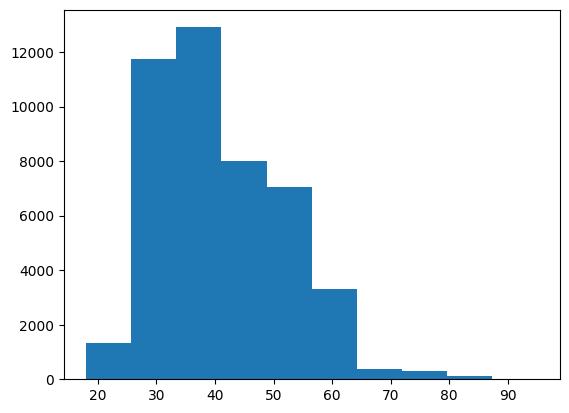

In [ ]:
#plot the histogram of age variable.

plt.hist(inp1["age"])

<Axes: ylabel='age'>

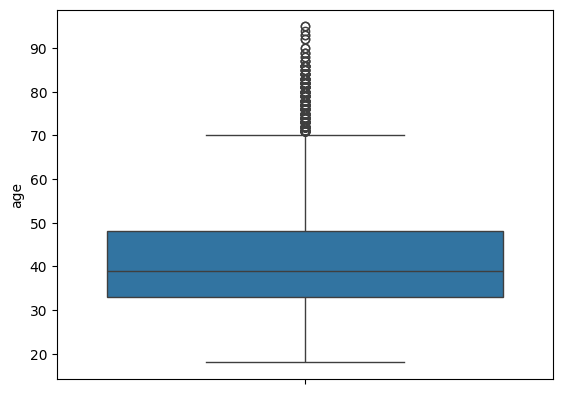

In [ ]:
#plot the boxplot of age variable.
sns.boxplot(inp1["age"])

#### Salary variable

In [ ]:
#describe the salary variable of inp1.
inp1["salary"].describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: ylabel='salary'>

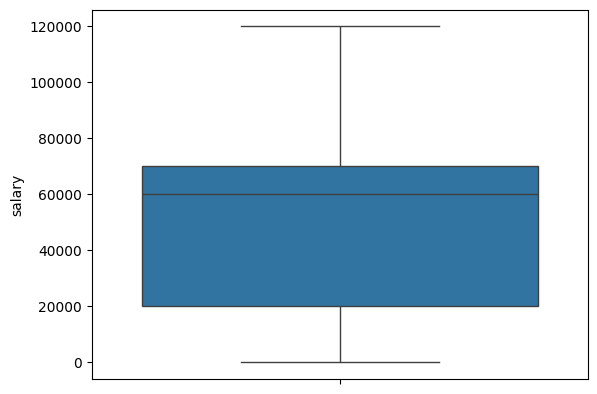

In [ ]:
#plot the boxplot of salary variable.
sns.boxplot(inp1['salary'])

#### Balance variable

In [ ]:
#describe the balance variable of inp1.
inp1['balance'].describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

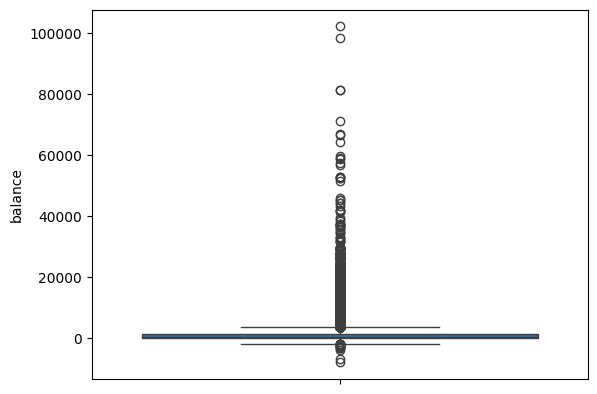

In [ ]:
#plot the boxplot of balance variable.
sns.boxplot(inp1['balance'])

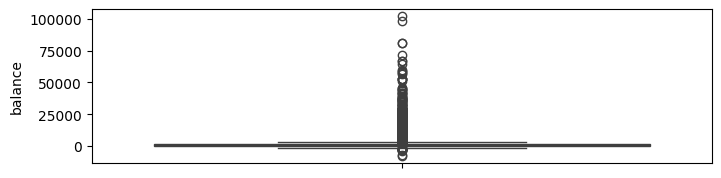

In [ ]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
sns.boxplot(inp1["balance"])
plt.show()

In [ ]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1["balance"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [ ]:
#describe the duration variable of inp1
inp1["duration"].describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [ ]:
#observing the duration column of the dataset
inp1["duration"].value_counts()


duration
1.5 min                 138
2.06666666666667 min    129
1.68333333333333 min    129
2.03333333333333 min    127
1.73333333333333 min    127
                       ... 
22.2333333333333 min      1
21.6333333333333 min      1
20.7666666666667 min      1
25.9333333333333 min      1
16.2833333333333 min      1
Name: count, Length: 2646, dtype: int64

In [ ]:
inp1["duration"].head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: str

In [ ]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1["duration"]=inp1["duration"].apply(lambda x:float(x.replace("sec",""))/60 if "sec" in x else float(x.replace("min","")))
inp1.head(20)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",2.316667,1,NaN,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",3.616667,1,NaN,0,unknown,no,management,tertiary
7,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",6.333333,1,NaN,0,unknown,no,entrepreneur,tertiary
8,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",0.833333,1,NaN,0,unknown,no,retired,primary
9,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",0.916667,1,NaN,0,unknown,no,technician,secondary


In [ ]:
#describe the duration variable
inp1["duration"].describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status

In [ ]:
#calculate the percentage of each marital status category.
inp1["marital"].value_counts(normalize=True)*100

marital
married     60.195744
single      28.294325
divorced    11.509931
Name: proportion, dtype: float64

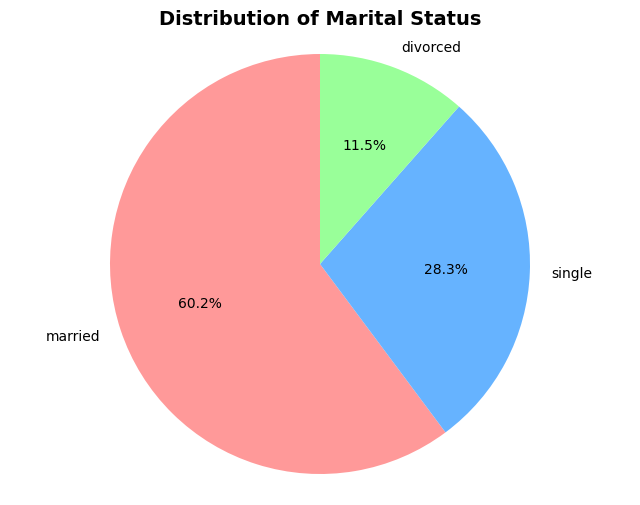

In [ ]:

# Plot the pie chart with percentage labels
plt.figure(figsize=(8, 6))
marital_percentages = inp1["marital"].value_counts(normalize=True) * 100

plt.pie(marital_percentages,
        labels=marital_percentages.index,  # Category names
        autopct='%1.1f%%',  # Display percentages with 1 decimal place
        startangle=90,  # Start from top
        colors=['#ff9999', '#66b3ff', '#99ff99'])  # Optional: custom colors

plt.title('Distribution of Marital Status', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<Axes: ylabel='marital'>

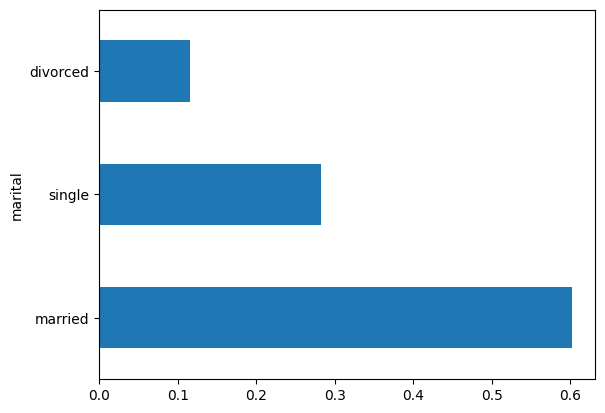

In [ ]:
#plot the bar graph of percentage marital status categories
inp1["marital"].value_counts(normalize=True).plot.barh()


#### Job  

In [ ]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)*100

job
blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: proportion, dtype: float64

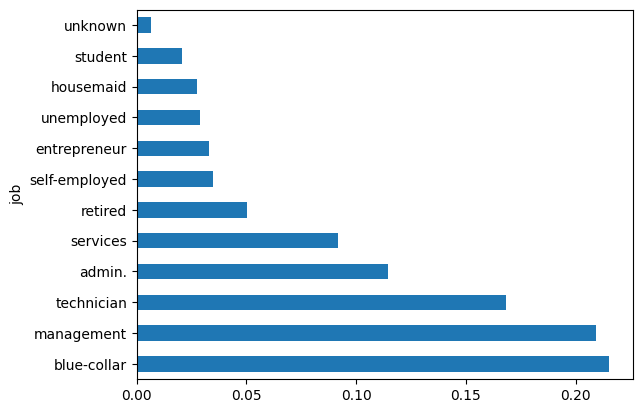

In [ ]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [ ]:
#calculate the percentage of each education category.
inp1["education"].value_counts(normalize=True)*100

education
secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: proportion, dtype: float64

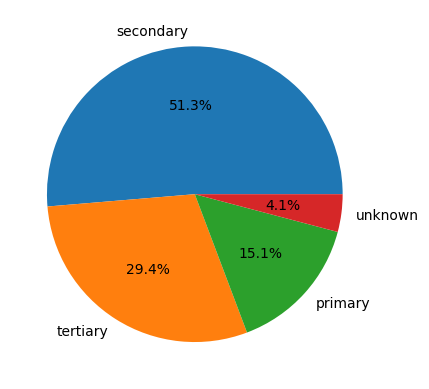

In [ ]:
#plot the pie chart of education categories
inp1["education"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()
# `autopct` (auto percentage) formats the labels inside the wedges.
# The value '%1.1f%%' is a format string:
# - %    : Starts the format code.
# - 1.1f : Formats the number as a float with at least 1 digit width and 1 decimal place.
# - %%   : Adds a literal '%' sign at the end.

#### poutcome

<Axes: ylabel='poutcome'>

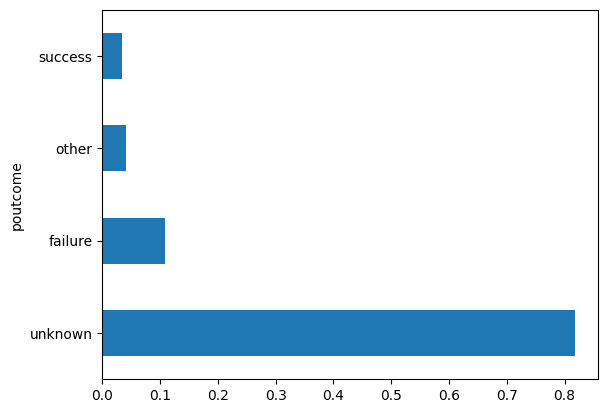

In [ ]:
#calculate the percentage of each poutcome category.
inp1["poutcome"].value_counts(normalize=True).plot.barh()

<Axes: ylabel='poutcome'>

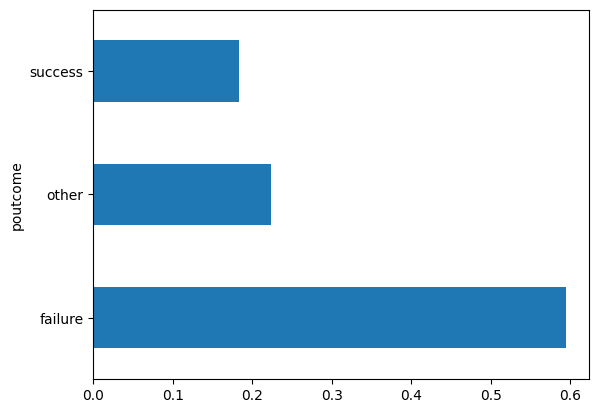

In [ ]:
#lets calculate for whom the campaign was done i.e not unknown
inp1[inp1["poutcome"]!="unknown"]["poutcome"].value_counts(normalize=True).plot.barh()

#### Response the target variable

In [ ]:
#calculate the percentage of each response category.
inp1["response"].value_counts(normalize=True)*100

response
no     88.297425
yes    11.702575
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Response Distribution')

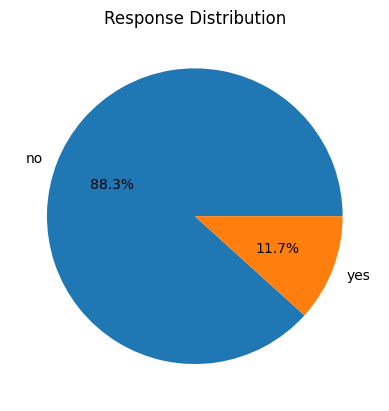

In [ ]:
#plot the pie chart of response categories
inp1["response"].value_counts(normalize=True).plot.pie(autopct='%.1f%%')
plt.title("Response Distribution")


## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

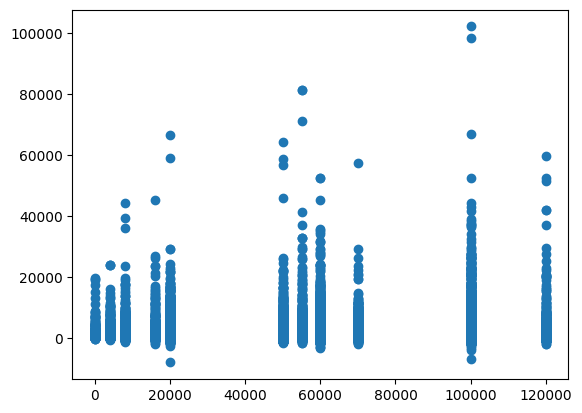

In [ ]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1["salary"],inp1["balance"])
plt.show()

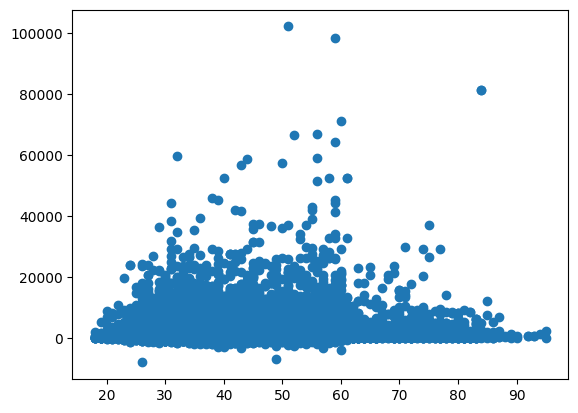

In [ ]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp1["age"],inp1["balance"])
plt.show()

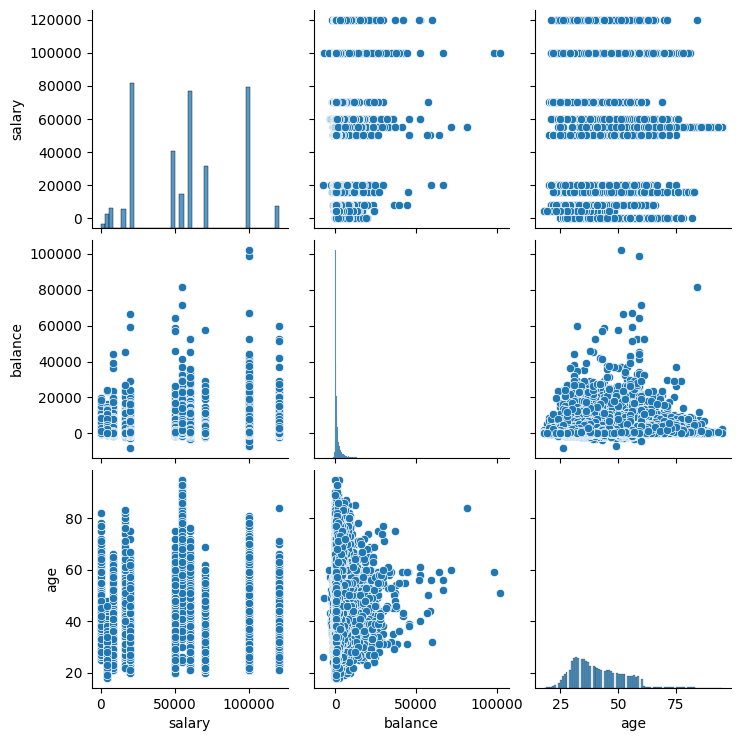

In [ ]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=["salary","balance","age"])

#### Correlation heat map

In [ ]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["salary","balance","age"]].corr()

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


<Axes: >

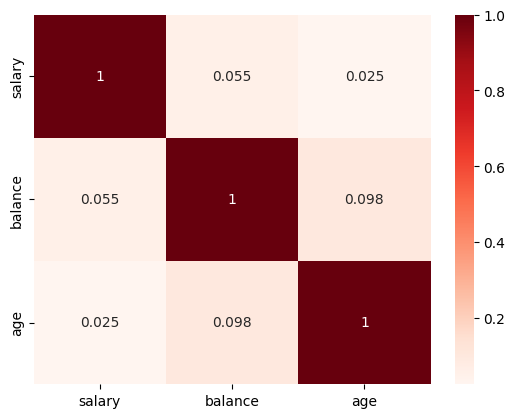

In [ ]:
sns.heatmap(inp1[["salary","balance","age"]].corr(),annot=True,cmap="Reds")

### Segment- 4, Numerical categorical variable

#### Salary vs response

In [ ]:
#groupby the response to find the mean of the salary with response no & yes seperatly.

inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

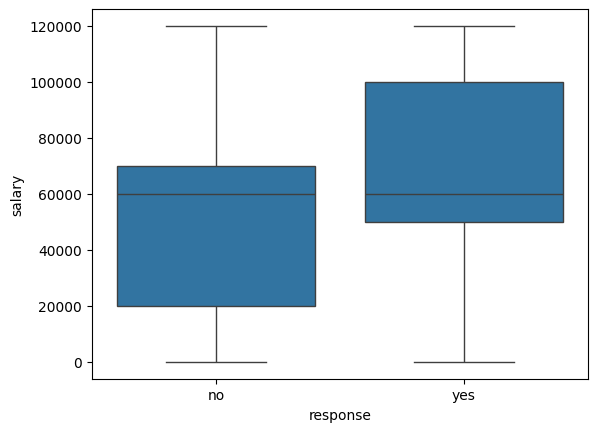

In [ ]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x="response",y="salary")

#### Balance vs response

<Axes: xlabel='response', ylabel='balance'>

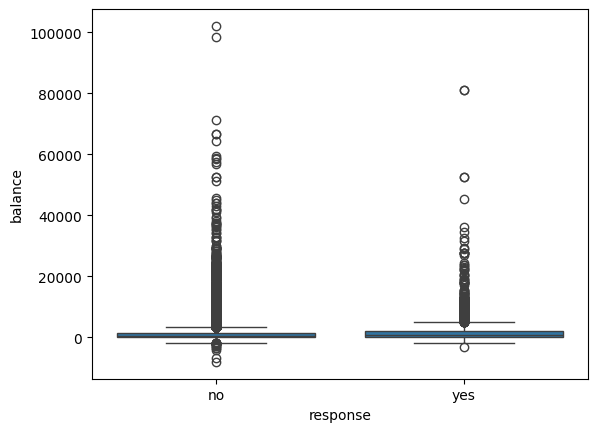

In [ ]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x="response",y="balance")

In [ ]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [ ]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile

In [ ]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [ ]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Axes: xlabel='response'>

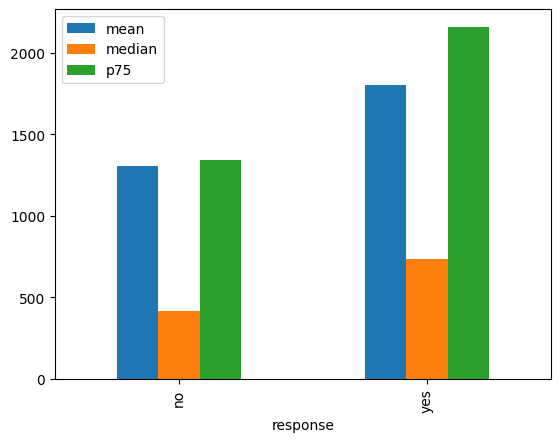

In [ ]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")["balance"].aggregate(["mean","median",p75]).plot.bar()

#### Education vs salary

In [ ]:
#groupby the education to find the mean of the salary education category.
inp1.groupby("education")["salary"].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [ ]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [ ]:
#groupby the job to find the mean of the salary for each job category.


### Segment- 5, Categorical categorical variable

In [ ]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"] = inp1["response"].map({"yes": 1, "no": 0})

In [ ]:
inp1["response_flag"].value_counts()

response_flag
0    39876
1     5285
Name: count, dtype: int64

In [ ]:
inp1["response_flag"].value_counts(normalize=True)

response_flag
0    0.882974
1    0.117026
Name: proportion, dtype: float64

In [ ]:
inp1.response_flag.mean()

np.float64(0.1170257523084077)

#### Education vs response rate

In [ ]:
#calculate the mean of response_flag with different education categories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [ ]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

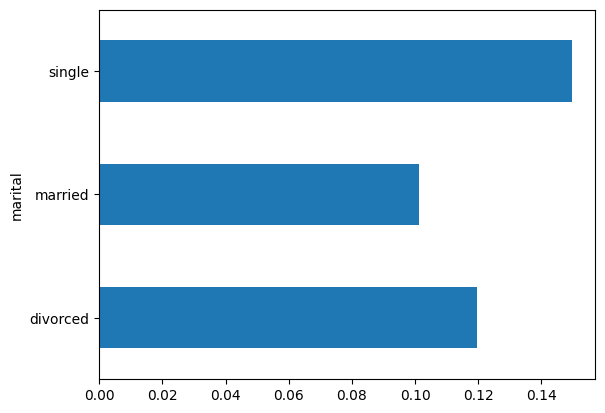

In [ ]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby("marital")["response_flag"].mean().plot.barh()

#### Loans vs response rate

<Axes: ylabel='loan'>

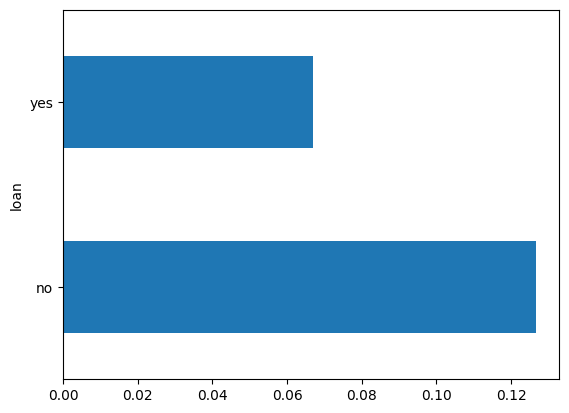

In [ ]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby("loan")["response_flag"].mean().plot.barh()

#### Housing loans vs response rate

<Axes: ylabel='housing'>

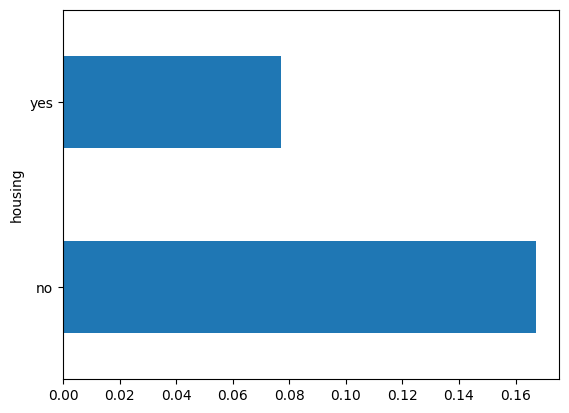

In [ ]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby("housing")["response_flag"].mean().plot.barh()

#### Age vs response

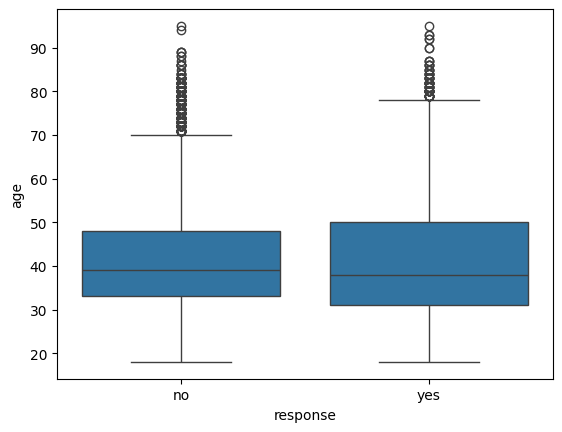

In [ ]:
#plot the boxplot of age with response_flag
sns.boxplot(x='response',y='age',data=inp0)
plt.show()

##### making buckets from age columns

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp1.age,[0,30,40,50,60,100],labels=["<30","30-40","40-50","50-60","60+"])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45161, dtype: category
Categories (5, str): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [ ]:
inp1["age_group"]=pd.cut(inp1.age,[0,30,40,50,60,100],labels=["<30","30-40","40-50","50-60","60+"])

In [ ]:
inp1["age_group"].value_counts(normalize=True)

age_group
30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: proportion, dtype: float64

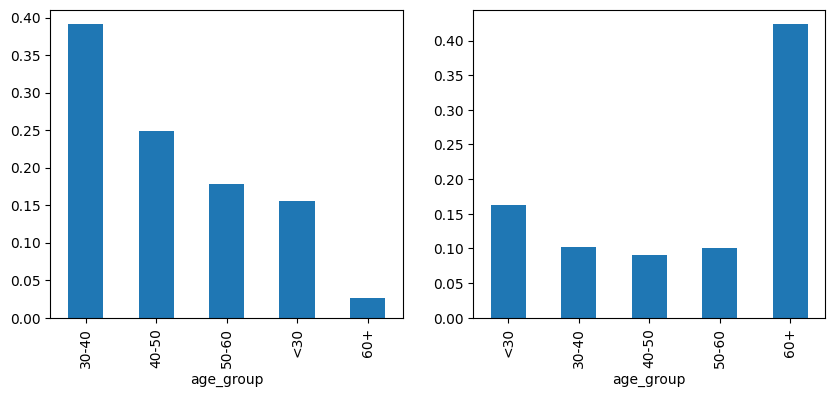

In [ ]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1["age_group"].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby("age_group")["response_flag"].mean().plot.bar()
plt.show()

<Axes: xlabel='job'>

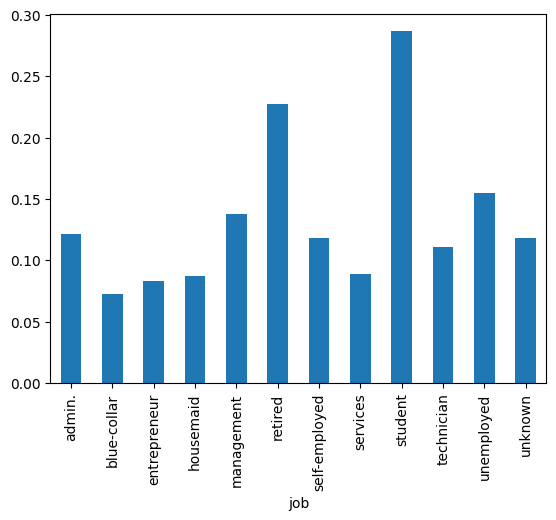

In [ ]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby("job")["response_flag"].mean().plot(kind="bar")

<Axes: xlabel='education'>

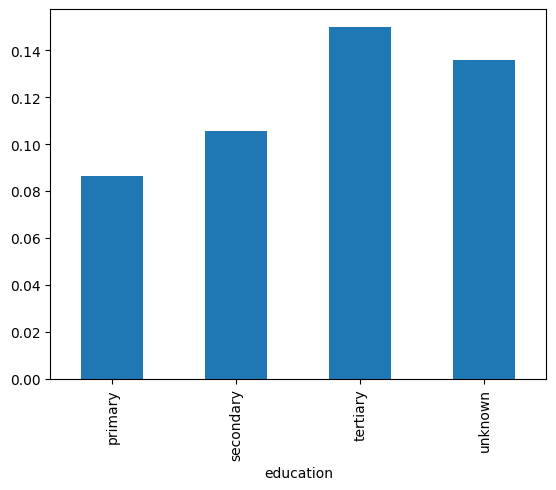

In [ ]:
#Lowest Percentage of Positive Responses in Education Category
#In the bank marketing campaign dataset, which of the following job categories has the lowest percentage of positive responses?
inp1.groupby("education")["response_flag"].mean().plot(kind="bar")

### Segment-6, Multivariate analysis

#### Education vs marital vs response

In [ ]:
res=pd.pivot_table(data=inp1,index="education",columns="marital",values="response_flag")

<Axes: xlabel='marital', ylabel='education'>

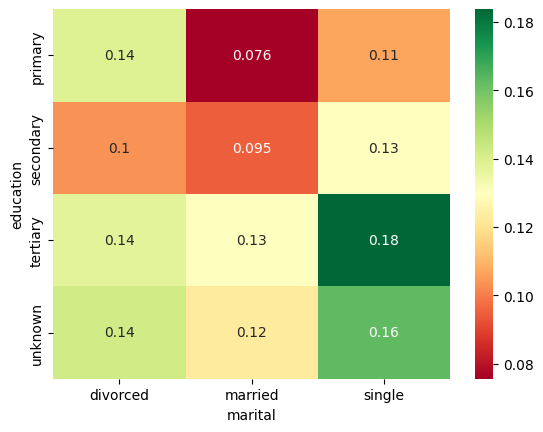

In [ ]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res,annot=True,cmap="RdYlGn")

#### Job vs marital vs response

<Axes: xlabel='marital', ylabel='job'>

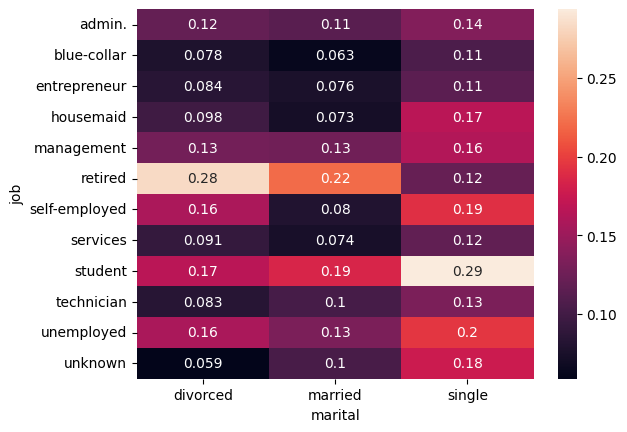

In [ ]:
#create the heat map of Job vs marital vs response_flag.
res1=pd.pivot_table(data=inp1,index="job",columns="marital",values="response_flag")
sns.heatmap(res1,annot=True)

#### Education vs poutcome vs response

<Axes: xlabel='poutcome', ylabel='education'>

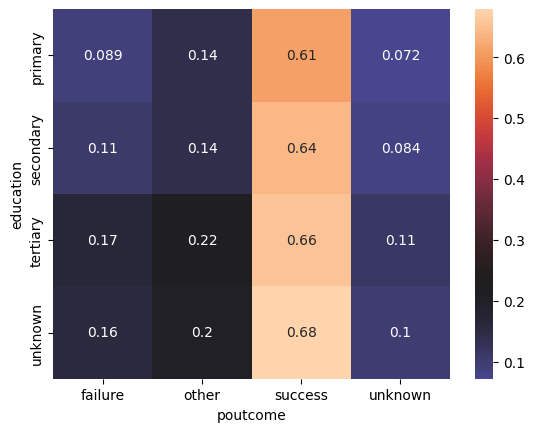

In [ ]:
#create the heat map of education vs poutcome vs response_flag.
res2=pd.pivot_table(data=inp1,index="education",columns="poutcome",values="response_flag")

sns.heatmap(res2,annot=True,center=0.2308)

In [ ]:
inp1[inp1.pdays>0].response_flag.mean()

np.float64(0.2307785593014795)